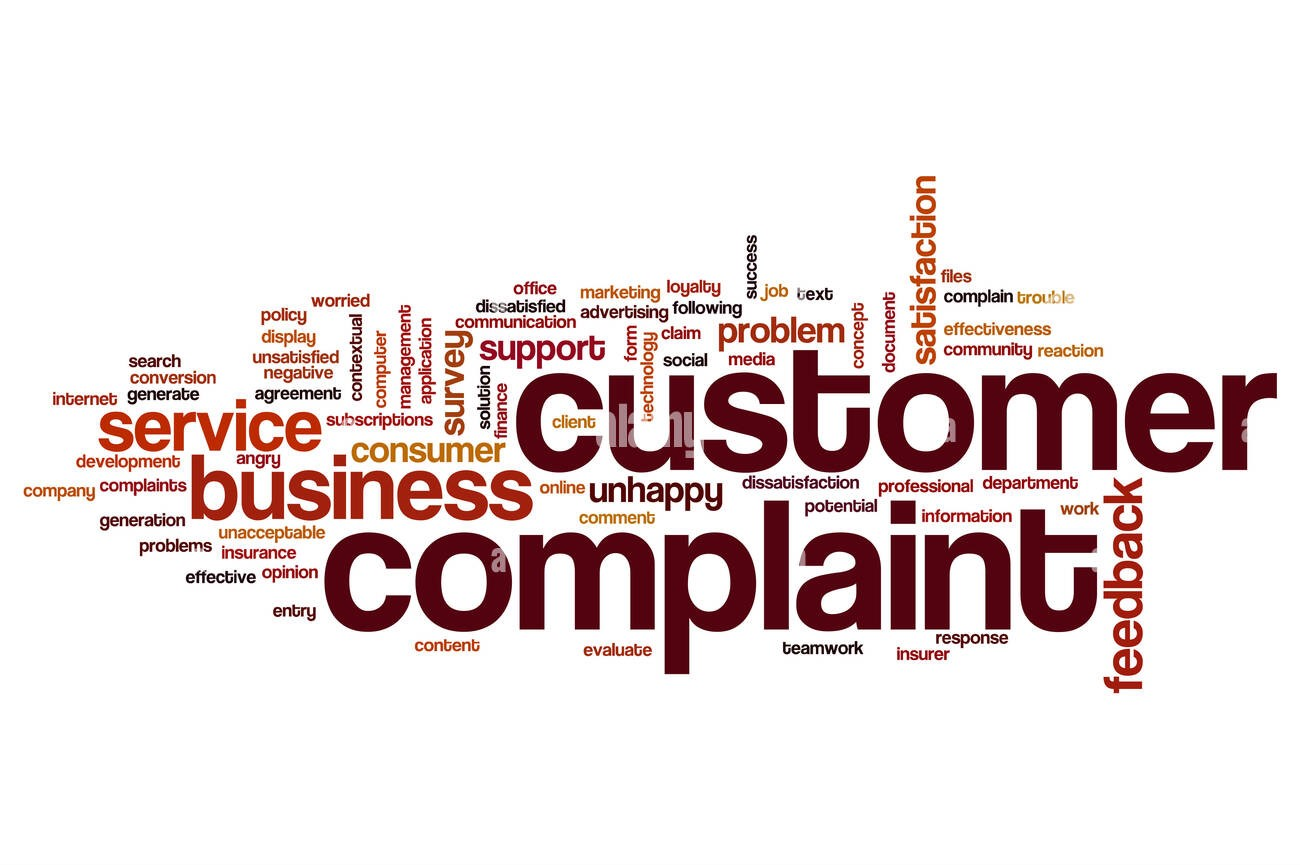

# Project Introduction:
- In the modern business landscape, understanding customer sentiments and addressing their concerns promptly is crucial for maintaining a positive brand image and achieving sustained growth. This project focuses on leveraging data science and machine learning techniques to gain valuable insights from customer complaints and predict whether a customer is likely to raise a dispute against a company's services. By doing so, businesses can proactively address customer issues, enhance customer satisfaction, and make data-driven decisions to improve their products and services.

# Objective:

The primary objective of this project is to develop a predictive model that can categorize customers into two groups: those who are likely to raise a dispute against a company's services and those who are not. This prediction is based on historical data of customer complaints and relevant features.

# Dataset Description:
- The dataset used in this project contains valuable information related to customer complaints, including following attributes:
- **Date received:** The day complaint was received.
- **Product:** Different products offered by the bank (credit cards, debit cards, different types of
transaction methods, accounts, locker services, and money-related).
- **Sub-product:** loan, insurance, other mortgage options.
- **Issue:** Complaint of customers.
- **Company public response:** Company's response to consumer complaint.
- **Company:** Company name.
- **State:** State where the customer lives (different state of USA).
- **ZIP code:** Zip code of are where the customer lives.
- **Submitted via:** Different platforms through which the complain was registered (online web, phone, referral, fax, post mail).
- **Date sent to company:** The day complaint was registered.
- **Timely response?:**  Whether the customer was timely responded or not. It is binary Yes means customer was responded on time and No means customer was not responded on time.
- **Consumer disputed?:** This is our target variable based on train data; we have two groups, one with a dispute and another don't have any issue. It is binary Yes/No, Yes means customer raised a dispute and No means he didn't.
- **Complaint ID:** ID of customer,unique to each consumer.


# Key Tasks

- **Data Preprocessing:** Data preprocessing is an essential step in data analysis and machine learning.
It involves preparing raw data into a format suitable for analysis or modeling.
Tasks may include handling missing values, dealing with outliers, and ensuring data consistency.
Data preprocessing aims to improve data quality, making it more reliable for further analysis.

- **Data Cleaning:** Data cleaning is a subset of data preprocessing focused on identifying and rectifying errors or inconsistencies in the dataset.
Tasks include correcting typos, resolving inconsistencies in naming conventions, and handling duplicate records.The goal is to ensure that the data is accurate, complete, and ready for analysis or modeling.
- **Exploratory Data Analysis (EDA):** EDA is a critical phase in data analysis, where data is visually and statistically explored to understand its characteristics. It involves creating various plots, histograms, scatter plots, bar charts, and summary statistics to uncover patterns, relationships, and anomalies in the data.

- **Data Preparation For Machine Learning:** Data preparation is the process of transforming raw data into a format suitable for machine learning algorithms.
It includes tasks such as feature engineering, encoding categorical variables, and scaling features.
Data preparation ensures that the data is in a format that machine learning models can effectively utilize.
- **Machine Learning:** Machine learning involves the development of models that can learn patterns and make predictions from data It includes selecting appropriate algorithms, splitting data into training and testing sets, and training models.The goal is to create predictive models that generalize well to unseen data.
- **Model Comparison:** Model comparison is the process of evaluating and comparing the performance of different machine learning models.Metrics like accuracy, precision, recall, F1-score, and ROC curves are used to assess model performance.The goal is to identify the model that best suits the problem at hand.

- **Dimensionality Reduction or Feature Selection:** Dimensionality reduction techniques reduce the number of features in a dataset while retaining relevant information.Feature selection methods identify and retain the most informative features.These techniques are used to address issues related to high-dimensional data, improve model efficiency, and reduce overfitting.
- **Choosing the Best Model:** Selecting the best model involves evaluating multiple models' performance and selecting the one that performs best on a specific problem.Cross-validation, grid search, and hyperparameter tuning help in the selection process.
The choice of the best model depends on the problem type, data characteristics, and evaluation metrics.

# Note
- I have added functions just before the cell in which they are used, this is done to make the code more readable and understandable to other people.

In [70]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
import re
import string
from nltk.tokenize import wordpunct_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTETomek, SMOTEENN
from sklearn.metrics import make_scorer, f1_score
import joblib
import warnings
warnings.filterwarnings("ignore")
nltk.download('wordnet')
nltk.download("punkt")
nltk.download("stopwords")


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [71]:
# loading the training and testing data
train = pd.read_csv("/content/Consumer_Complaints_train.csv")
test = pd.read_csv("/content/Consumer_Complaints_test.csv")

In [72]:
# checking the training data
train.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2015-10-14,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,NaN,NaN,Equifax,GA,30134,NaN,Consent not provided,Web,2015-10-14,Closed with explanation,Yes,No,1605653
1,2015-04-26,Bank account or service,Other bank product/service,Deposits and withdrawals,NaN,RE : XXXX XXXX XXXX-PRIVILEGED AND CONFIDENTIA...,NaN,Wells Fargo & Company,GA,319XX,NaN,Consent provided,Web,2015-04-26,Closed with explanation,Yes,Yes,1347613
2,2013-12-20,Credit card,NaN,Other,NaN,NaN,NaN,Citibank,SC,29203,NaN,NaN,Phone,2014-01-03,Closed with non-monetary relief,Yes,No,640394
3,2016-03-03,Debt collection,"Other (i.e. phone, health club, etc.)",Disclosure verification of debt,Not given enough info to verify debt,NaN,Company has responded to the consumer and the ...,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,43082,NaN,NaN,Referral,2016-03-04,Closed with explanation,Yes,No,1815134
4,2015-01-30,Debt collection,Medical,Disclosure verification of debt,Not given enough info to verify debt,NaN,NaN,"HCFS Health Care Financial Services, Inc.",CA,90036,NaN,NaN,Web,2015-01-30,Closed with explanation,Yes,Yes,1218613


In [73]:
# chekcing the testing data
test.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID
0,2015-01-17,Credit card,NaN,Customer service / Customer relations,NaN,NaN,NaN,Citibank,TX,75241,NaN,NaN,Web,2015-01-17,Closed with monetary relief,Yes,1198133
1,2016-06-22,Consumer Loan,Title loan,Payment to acct not credited,NaN,NaN,Company believes it acted appropriately as aut...,"Larsen MacColl Partners II, L.P.",TX,76548,Servicemember,NaN,Phone,2016-06-22,Closed with explanation,Yes,1979989
2,2015-09-04,Credit card,NaN,Credit line increase/decrease,NaN,I WANT TO REQUEST A CREDIT LINE INCREASE OF XX...,NaN,Capital One,NC,271XX,NaN,Consent provided,Web,2015-09-04,Closed with explanation,Yes,1552090
3,2016-05-17,Consumer Loan,Installment loan,Problems when you are unable to pay,NaN,I have asked One Main Financial not to call my...,NaN,"OneMain Financial Holdings, LLC",MO,634XX,NaN,Consent provided,Web,2016-05-20,Closed with non-monetary relief,Yes,1929306
4,2016-07-07,Debt collection,"Other (i.e. phone, health club, etc.)",Improper contact or sharing of info,Contacted employer after asked not to,I have received several calls from a XXXX XXXX...,Company has responded to the consumer and the ...,"GMA Investments, LLC",SC,296XX,NaN,Consent provided,Web,2016-07-07,Closed with explanation,Yes,2001667


In [74]:
# checking data types of columns of training data
train.dtypes

Date received                   object
Product                         object
Sub-product                     object
Issue                           object
Sub-issue                       object
Consumer complaint narrative    object
Company public response         object
Company                         object
State                           object
ZIP code                        object
Tags                            object
Consumer consent provided?      object
Submitted via                   object
Date sent to company            object
Company response to consumer    object
Timely response?                object
Consumer disputed?              object
Complaint ID                     int64
dtype: object

In [75]:
# checking data types of columns of testing data
test.dtypes

Date received                   object
Product                         object
Sub-product                     object
Issue                           object
Sub-issue                       object
Consumer complaint narrative    object
Company public response         object
Company                         object
State                           object
ZIP code                        object
Tags                            object
Consumer consent provided?      object
Submitted via                   object
Date sent to company            object
Company response to consumer    object
Timely response?                object
Complaint ID                     int64
dtype: object

In [76]:
print("Shape of training data {}".format(train.shape))
print("Shape of testing data {}".format(test.shape))

Shape of training data (358810, 18)
Shape of testing data (119606, 17)


# Data Cleaning

In [77]:
def clean_data(df):
    """
    This function takes a pandas DataFrame, calculates the percentage of null values for each column,
    and identifies columns with null values exceeding 25%. For columns with less than 25% null values,
    it imputes the missing values with the column mode.

    Parameters:
        - df (pandas.DataFrame): The DataFrame to be cleaned.

    Returns:
        - pandas.DataFrame: A cleaned DataFrame with null values imputed and columns with more than
          25% null values removed.
    """

    # Making a list to store columns with more than 25% null values
    col_drop = []

    # Applying a for loop to iterate on each column of a dataframe
    for col in df.columns:

        # Calculating null value percentage in a column
        null_val = ((df[col].isna().sum()) / df.shape[0]) * 100

        # Applying the condition: if column has more than 25% null values, then append it to the list
        if null_val > 25:
            col_drop.append(col)

        # If column has null values less than 25%, impute them using the column mode
        else:
            col_mode = df[col].mode()[0]
            df.loc[df[col].isna() == True, col] = col_mode

        # Printing the columns with their null value percentage
        #print("Percentage of Null Values in column {} is {}".format(col, null_val))

    # Dropping the columns having more than 25% null values
    new_data = df.drop(col_drop, axis=1)

    # Returning clean data free of null values
    return new_data


In [78]:
# making a function to remove duplicate values from data
def remove_duplicates(data):
  """
  Making a function that takes a dataframe and remove the duplicate values in it and return clean data free of duplicates

  Parameters: Data, A pandas DataFrame

  Returns:
  Pandas DataFrame Free of duplicated values"""
  clean_data = data.drop_duplicates()
  return clean_data

In [79]:
# cleaning the training data
clean_train = clean_data(train)

# cleaning the training data
clean_test = clean_data(test)

In [80]:
# removing the duplicates from our data and saving as df
df = remove_duplicates(clean_train)

# removing the duplicates from the test data
clean_test = remove_duplicates(clean_test)

In [81]:
def extract_date_components(df, date_column, components):
    """
    This Function will extract specified date components and create new columns in the DataFrame.

    Parameters:
        - df (pandas.DataFrame): The DataFrame to operate on.
        - date_column (str): The name of the date column to be converted.
        - components (list of str): A list of date components to extract ('Year', 'Month', 'Day', etc.).

    Returns:
        - pandas.DataFrame: The DataFrame with new columns for the specified date components.
    """
    # Converting the specified date column to datetime format
    df[date_column] = pd.to_datetime(df[date_column])

    # Extracting the specified date components and create new columns for each
    for component in components:
        if component == 'Year':
            df[component] = df[date_column].dt.year
        elif component == 'Month':
            df[component] = df[date_column].dt.month
        elif component == 'Day':
            df[component] = df[date_column].dt.day


    return df



In [82]:
# Extracting day, month, and year from date received column

# defining a list of components to be extracted
components_to_extract = ["Day",'Month','Year']

# defining the data column in ur data
date_column = "Date received"

# applying the function to extract Day, Month and Year form Date received column
df = extract_date_components(df,date_column,components_to_extract)

# applying the function to extract Day, Month and Year form Date received column on testing data
clean_test = extract_date_components(clean_test,date_column,components_to_extract)


In [83]:
def calculate_days_held(df, date_received_col, date_sent_col):
    """
    This function will Calculate the number of days a complaint was held by the company and add a 'Days Held' column to the DataFrame.

    Parameters:
        - df (pandas.DataFrame): The DataFrame containing the data.
        - date_received_col (str): The name of the 'Date received' column.
        - date_sent_col (str): The name of the 'Date sent to company' column.

    Returns:
        - pandas.DataFrame: The DataFrame with a new 'DaysHeld' column.
    """
    # Converting the date columns to datetime format
    df[date_received_col] = pd.to_datetime(df[date_received_col])
    df[date_sent_col] = pd.to_datetime(df[date_sent_col])

    # Calculating the number of days the complaint was held
    df['Days Held'] = (df[date_sent_col] - df[date_received_col]).dt.days

    return df




In [84]:
# defining the date recieved
date_received = 'Date received'

# defining the date sent
date_sent = 'Date sent to company'

# adding new field days held using the function
df = calculate_days_held(df,date_received,date_sent)

# adding new field days held in testing data
clean_test = calculate_days_held(clean_test,date_received,date_sent)

In [85]:
def drop_columns(df, columns_to_drop):
    """
    This function will drop specified columns from the DataFrame and return the modified DataFrame.

    Parameters:
        - df (pandas.DataFrame): The DataFrame from which columns should be dropped.
        - columns_to_drop (list of str): A list of column names to be dropped.

    Returns:
        - pandas.DataFrame: The DataFrame with specified columns removed.
    """
    # Use the drop method to remove the specified columns
    df_without_dropped = df.drop(columns=columns_to_drop)

    return df_without_dropped

In [86]:
# defining names of columns to drop in a list
col_drop = ['Date received','Date sent to company','ZIP code','Complaint ID']

# dropping the unnecessary columns
df = drop_columns(df,col_drop)

# dropping the unnecessary columns from the testing data
clean_test = drop_columns(clean_test,col_drop)

In [87]:
# making  a  function to create the week received column
def calculate_week_received(df, days_held_col):
    """
    This function will calculate the week based on the 'DaysHeld' column and add a 'Week_Received' column to the DataFrame.

    Parameters:
        - df (pandas.DataFrame): The DataFrame containing the data.
        - days_held_col (str): The name of the 'DaysHeld' column used to calculate the week.

    Returns:
        - pandas.DataFrame: The DataFrame with a new 'Week_Received' column.
    """
    # Calculating the week based on the 'DaysHeld' column without
    df['Week_Received'] = (df[days_held_col] / 7).astype(int)

    return df





In [88]:
# defining the days held column
day_held = "Days Held"

# applying the function to create week recieved column
df = calculate_week_received(df,day_held)

# applying th function to create week recieved variable in testing data
clean_test = calculate_week_received(clean_test,day_held)

# Exploratory Data Analysis

In [89]:
# storing the data of disputed people, this is done to analze the customers that raised a dispute
disputed_cons = df[df["Consumer disputed?"] == "Yes"]

In [90]:
      """
    This function will create a barplot based on the frequency of unique values in a column of the given dataset.
    It takes an argument top_n, that will plot the top categories of the column as specified, this is done to make the plot presentable and customizable.

    Args:
    data (pandas.DataFrame): The dataset containing the column to plot.
    column (str): The name of the column in the dataset to analyze.
    title (str): The title of the barplot.
    xlabel (str): The label for the x-axis.
    ylabel (str): The label for the y-axis.
    top_n (int, optional): If specified, only the top N most frequent values will be plotted. Default is None.

    Returns:
    None
    """
def make_barplot(data,column,title,xlabel,ylabel,top_n=None):
  column_counts = data[column].value_counts()

  if top_n is not None:
    column_counts = data[column].value_counts()[:top_n]

    # making  a barplot using the data
    fig = px.bar(column_counts,x=column_counts.values,color =column_counts.index, y=column_counts.index,title=title)

    # Adding x-axis label
    fig.update_xaxes(title=xlabel)

    # Adding y-axis label
    fig.update_yaxes(title=ylabel)

    # turning off the y ticks if more categories in a column for better presentation
    fig.update_yaxes(title=ylabel, showticklabels=False)

    # Showing the plot
    fig.show()

    # defining the else condition
  else:
    # making  a barplot using the data
    fig = px.bar(column_counts,x=column_counts.values,y=column_counts.index,color =column_counts.index,title=title)

    # Adding x-axis label
    fig.update_xaxes(title=xlabel)

    # Adding y-axis label
    fig.update_yaxes(title=ylabel)

    # Showing the plot
    fig.show()



In [91]:
disputed_cons["Product"].value_counts()[:5]

Mortgage                   28080
Debt collection            12776
Credit reporting           10806
Credit card                 9409
Bank account or service     8245
Name: Product, dtype: int64

In [92]:
# defining column to use
consumer_dispute = "Consumer disputed?"

# making barplot using function
make_barplot(df,consumer_dispute,"Consumer Disputed vs. Non-Disputed Customers", "Consumer Count","Consumer Dispute",)

In [93]:
# defining column to use
product = "Product"

# making barplot of the column
make_barplot(disputed_cons,product,"Consumer Disputes By Product", "Consumer Disputed Count","Consumer Disputed Product")

In [94]:
issue = "Issue"
make_barplot(disputed_cons,issue,"Top 10 Consumer Disputes Issues", "Consumer Disputed Count","Consumer Issue",10)

In [95]:
state = "State"
make_barplot(disputed_cons,state,"Top 10 States With Disputes", "Consumer Disputed Count","Consumer State",10)

In [96]:
# defining the column
source = 'Submitted via'

# making barplot
make_barplot(disputed_cons,source,"Dispute Submission Source", "Consumer Disputed Count","Dispute Source")


In [97]:
# defining the column
company_response = "Company response to consumer"

# making barplot
make_barplot(df,company_response,"Total Number Of Dispute Where Company Responded", "Count","Company Response",10)


In [98]:
# defining the column
company_response = "Company response to consumer"

# making barplot
make_barplot(disputed_cons,company_response,"Company Response Lead to Consumer Disputes", "Count","Company Response",10)


In [99]:
# defining the column
company_response = "Timely response?"

# making barplot
make_barplot(disputed_cons,company_response,"Disputes Timely Response Vs Non-timely", "Count","Timely Response")


In [100]:
# converting year from int data type to object
disputed_cons["Year"] = disputed_cons["Year"].astype(str)

In [101]:
# defining the column
dispute_year = "Year"

# making barplot
make_barplot(disputed_cons,dispute_year,"Disputes By Year", "Count","Year")


In [102]:
# Counting the occurrences of each combination of 'Year' and 'Consumer disputed?'
count_df = df.groupby(['Year', "Consumer disputed?"]).size().reset_index(name='count')

# Creating the countplot
fig = px.bar(count_df, x='Year', y='count', color="Consumer disputed?", title='Countplot of Year with Consumer Dispute?')

# Showing the plot
fig.show()

In [103]:
# defining the column
company = "Company"

# making barplot
make_barplot(disputed_cons,company,"Top 10 Company with Most Complains", "Count","Company",10)


# Data Preparation For Machine Learning

In [104]:
# checking the days held column
df["Days Held"].describe()

count    358810.000000
mean          4.456339
std          16.741676
min          -1.000000
25%           0.000000
50%           1.000000
75%           4.000000
max         993.000000
Name: Days Held, dtype: float64

In [105]:
# calculating any negative days held
days_held_negative = len(df[df["Days Held"] < 0])
print("Number of Days Held negative are {}".format(days_held_negative))

Number of Days Held negative are 4135


- So, the number of days held cannot be negative as it is the time taken by authorities, I will replace them with 0.

In [106]:
# converting negative days held into zero
df.loc[df["Days Held"] < 0,"Days Held"] = 0

In [107]:
# calculating the unique values in all the object columns
for col in df.columns:
  if df[col].dtype=="object":
    uniq_val = len(df[col].unique())
    print("Unique Values in Column {} are {}".format(col,uniq_val))

Unique Values in Column Product are 12
Unique Values in Column Issue are 95
Unique Values in Column Company are 3064
Unique Values in Column State are 62
Unique Values in Column Submitted via are 6
Unique Values in Column Company response to consumer are 6
Unique Values in Column Timely response? are 2
Unique Values in Column Consumer disputed? are 2


- As company,and state has a lot of unique values, I will drop company and state column but not the issue column as it is the main feature, I will use NLP techniques on this column later to make it useful.

In [108]:
# dropping the unnecessary columns for  building model
col_drop_second = ['Company','State','Days Held']

# dropping from labeled data
df = drop_columns(df,col_drop_second)

# dropping columns from testing data
clean_test = drop_columns(clean_test,col_drop_second)

In [109]:
# converting the target column into numerical, Yes with 1 and No with 0
df["Consumer disputed?"] = df["Consumer disputed?"].replace({"Yes":1,"No":0})

In [110]:
# separating the issue column to apply NLP techniques
issue = df["Issue"]

# dropping from the data
df.drop("Issue",axis=1,inplace=True)

# separating issue column from testing data
issue_test = clean_test["Issue"]

# dropping from the testing data
clean_test.drop("Issue",axis=1,inplace=True)

In [111]:
# applying dummy function to get dummies for categorical variables
df_dummy = pd.get_dummies(df)

# getting dummies for testing data
df_dummy_test = pd.get_dummies(clean_test)

# NLP Technique For Issue Column
- In text data, we need to clean the raw data by following several processes, such as segmentation, stop word removal, stemming, tokenization, and more.

- **Tokenization** is essential for splitting a sentence, paragraph, or document into smaller units like individual words and phrases; each of these smaller units is called tokens. For example, the sentence "I love machine learning" would be tokenized into ["I", "love", "machine", "learning"].


- **Stop word removal**, in general, refers to filtering out words whose presence in a sentence makes no difference to the analysis of our data. We remove stop words to simplify the model. For instance, common English stop words like "the," "and," and "in" are often removed from text.


- **Stemming** is the process of converting a word into its root form. For example, if we have the word "GIVING," after applying stemming, it will become "GIVE." Similarly, "running" might be stemmed to "run."


- **Text Vectorization** is the process of converting text into a numerical representation. Here, we convert it into a bag-of-words model, which signifies or represents a text and describes the occurrence of words in that document. It is used to transform a given text into a vector based on the frequency (count) of each word that occurs in the entire text. For instance, the sentence "Machine learning is fun" could be vectorized as [1, 1, 1, 0, 0], indicating the presence or absence of each word.

In [112]:
def preprocess_data(data):
    """
    This function will preprocess text data.
    It will do following things:
    1) Tokenization.
    2) Punctuation removal.
    3) Stop word removal.
    4) Lemmentization.
    5) Stemming.
    6) Joining the text segments back after cleaning.

    Args:
    data (pandas.Series): The text data to preprocess.

    Returns:
    List: The preprocessed text data.
    """
    # Tokenization and lowercase conversion
    tokenized_data = data.apply(lambda x: wordpunct_tokenize(x.lower()))

    # Punctuation removal
    def remove_punctuation(text):
        no_punctuation = [w for w in text if w not in string.punctuation]
        return no_punctuation

    no_punctuation_data = tokenized_data.apply(lambda x: remove_punctuation(x))

    # Stop word removal
    stop_words = stopwords.words('english')
    filtered_sentence = [w for w in no_punctuation_data if not w in stop_words]
    filtered_sentence = pd.Series(filtered_sentence)

    # Lemmatization
    def lemmatize_text(text):
        lem_text = [WordNetLemmatizer().lemmatize(w, pos='v') for w in text]
        return lem_text

    lemmatized_data = filtered_sentence.apply(lambda x: lemmatize_text(x))

    # Stemming
    def stem_text(text):
        stem_text = [PorterStemmer().stem(w) for w in text]
        return stem_text

    stemmed_data = lemmatized_data.apply(lambda x: stem_text(x))

    # Joining words back into sentences
    def word_to_sentence(text):
        text_sentence = " ".join(text)
        return text_sentence

    clean_data = stemmed_data.apply(lambda x: word_to_sentence(x))

    return clean_data




In [113]:
# Preprocessing the issue column data
cleaned_data = preprocess_data(issue)

# preprocessing the issue column of testing data
cleaned_issue_test = preprocess_data(issue_test)

In [114]:
def vectorize_data(data):
    """
    This function will Vectorize text data using TF-IDF and return feature data and feature weights.

    Args:
    data (pandas.Series): The text data to vectorize.

    Returns:
    pandas.DataFrame: Dataframe with vectorized data and features.
    pandas.DataFrame: Dataframe with TF-IDF feature weights.
    """
    # Create a TF-IDF vectorizer
    tf = TfidfVectorizer()

    # Fit and transform the input data
    vectorized_data = tf.fit_transform(data).toarray()

    # Generate column names for the features
    tf_columns = ['Feature' + str(i+1) for i in range(vectorized_data.shape[1])]

    # Create a DataFrame for vectorized data
    vectorized_df = pd.DataFrame(vectorized_data, columns=tf_columns)

    # Create a DataFrame for TF-IDF feature weights
    weights = pd.DataFrame(tf.idf_, index=tf.get_feature_names_out(), columns=['Idf_weights']).sort_values(by='Idf_weights', ascending=False)

    return vectorized_df, weights




In [115]:
# applying the function and retirving the vectorized data and weights
v_df,weight_df  = vectorize_data(cleaned_data)

# applying the function and retrieving vectorized data and weights for testing data
v_df_test,weight_df_test = vectorize_data(cleaned_issue_test)

In [116]:
def merge_dataframes(df1, df2):
    """
    This function will merge two dataframes side by side (horizontally).

    Args:
    df1 (pd.DataFrame): The first dataframe to merge.
    df2 (pd.DataFrame): The second dataframe to merge.

    Returns:
    pd.DataFrame: The combined dataframe with columns from both input dataframes.
    """
    # Use concat to merge the dataframes horizontally (axis=1).
    merged_df = pd.concat([df1, df2], axis=1)

    return merged_df


In [117]:
# merging the dataframes to get the final data
final_df = merge_dataframes(df_dummy,v_df)

# merging the testing data
final_df_test = merge_dataframes(df_dummy_test,v_df_test)


In [118]:
# saving cleaned training and testing data
final_df.to_csv("cleaned_training.csv")
final_df_test.to_csv("cleaned_testing.csv")

# Sampling Data
- The data we have at hand is quite big, so I will sample 10% data from the complete data and experiment with it.

In [119]:
# # as the data is quite big and i dont have much computation resources, I will use 10% of the training data only
sample_df = final_df.sample(frac=0.10,random_state=2)
sample_df.shape

(35881, 199)

In [120]:
# separating the features and target variable

# features
X = sample_df.drop("Consumer disputed?",axis=1)

#  target variable
y = sample_df[["Consumer disputed?"]]

In [121]:
# scaling the features
X_scaled = StandardScaler().fit_transform(X)

# making dataframe of scaled features
X_scaled_df = pd.DataFrame(X_scaled,columns=X.columns)

# The machine learning models used are:
- K-nearest neighbors
- Decision Tree Classifier
- Random Forest Classifier
- Gradient Boosting Classifier
- XGBoost Classifier
- Logistic Regression
- Naive Bayes
- Ada Boost
- Stochastic Gradient Boosting

# Evaluation metrics used are:
- Accuracy score
- Classification Report
- Confusion Matrix

# Accuracy:
- Accuracy is a common evaluation metric used in classification problems to measure the percentage of correctly predicted instances relative to the total number of instances. It is calculated as the ratio between the number of correct predictions and the total number of predictions. A high accuracy value indicates good performance of the model in predicting the correct class labels. However, this metric may not be appropriate for unbalanced datasets where the distribution of classes is not uniform.


# Classification Report:
- A classification report is a performance evaluation metric used in machine learning to evaluate the quality of a classification model. It summarizes the precision, recall, F1 score, and support for each class in the classification task. The report provides information on how well the model performs for different classes and how good the balance is between precision and recall.

- Precision: Precision is the ratio of true positives to the sum of true positives and false positives. It measures the proportion of correctly identified positive instances to all instances predicted as positive by the model. If a model reports a precision of 0.8 for class 1, it means that when it predicts class 1, it is 80% confident that this observation belongs to that class 1.

- Recall: Recall is the ratio of true positive predictions to the sum of true positive and false negative predictions. It measures the proportion of positive instances that were correctly detected by the model. A high hit ratio means that the model can identify the most positive instances.

- F1 score: The F1 score is the harmonic mean of Precision and Recall. It is a balanced metric that considers both precision and recall. It provides a single value that summarizes a model's performance in both metrics. A high F1 value means that the model has high precision and high recall, indicating good overall performance.


# Confusion Matrix:
- A confusion matrix is a performance evaluation metric that shows the number of true positives, false positives, true negatives, and false negatives for each class in a classification problem. It provides a way to evaluate the performance of a classification model by comparing the predicted and true class labels. The confusion matrix tells us where the model is confused and which class label is confused with other class labels. By analyzing the confusion matrix, we can improve the model by adding more instances of a particular class label, etc.


# Selection of a machine learning model
- Selecting a machine learning model is a hectic task. The main idea listed in the Hands On Machine Learning book is that we apply a set of algorithms with default hyperparameters to the dataset and select the algorithm(s) with the highest performance and then perform grid search to find the best parameters for the best model(s).

In [122]:
# splitting the data into training and validation
X_train,X_val,y_train,y_val = train_test_split(X_scaled_df,y,test_size=0.2,random_state=1)

# Machine learning Without Any Imbalanced Technique Applied On Data

In [123]:
#  target class distribution
target_distribution = df["Consumer disputed?"].value_counts()

# Creating a DataFrame for the pie chart
pie_data = pd.DataFrame({'count': target_distribution.values}, index=target_distribution.index)

# Creating the pie chart
fig = px.pie(pie_data, names=pie_data.index, values='count', title='Target Distribution (Complete Data)')

# Showing the plot
fig.show()

In [124]:
# computing value counts of target classes for sample data
target_distribution = sample_df["Consumer disputed?"].value_counts()

# Create a DataFrame for the pie chart
pie_data = pd.DataFrame({'count': target_distribution.values}, index=target_distribution.index)

# Create the pie chart
fig = px.pie(pie_data, names=pie_data.index, values='count', title='Target Distribution (Sample Data)')

# Show the plot
fig.show()

- We can clearly see from the pie plot of complete data and sample data, that we have class imbalance.

- I will not use any technique to deal with imbalance data and see how the algorithms work, if our algorithm learns the majority class, it will have accuracy of 78%, which can be treated as baseline accuracy of model.

- Accuracy Score is not a good evaluation matrix when we have imbalance classes in data, we will see why it is not good.

- I will use precision,recall f1 score and confusion matrix for further evaluation models when I will apply imbalnce class techniques on my data.

In [125]:
# defining models that we are using
knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
lgc = LogisticRegression()
nbc = GaussianNB()
abc = AdaBoostClassifier()
gbc = GradientBoostingClassifier()
xgb = XGBClassifier()
sgc = SGDClassifier()

# storing models in a list
models = [knn,dtc,rfc,lgc,nbc,abc,gbc,xgb,sgc]

In [126]:
def evaluate_models(X, y, metric, models):
    """
    Evaluate multiple models using cross-validation and return the results in a DataFrame.

    Parameters:
    - X: Features DataFrame
    - y: Target variable Series
    - metric: Scoring metric for cross-validation (e.g., 'accuracy', 'f1', 'roc_auc', etc.)
    - models: List of machine learning models to evaluate

    Returns:
    - model_performance: DataFrame with model names and their average scores
    """
    model_names = [model.__class__.__name__ for model in models]
    mean_score = []

    for model, name in zip(models, model_names):
        cross_score = cross_val_score(model, X, y, cv=5, scoring=metric)
        # print("Cross validation scores for {} model are {}".format(name, cross_score))
        average_score = np.mean(cross_score)
        mean_score.append(average_score)
        #print("-" * 100)

    # Create a DataFrame to store the model performance
    model_performance = pd.DataFrame({"Model": model_names, "Average {}".format(metric): mean_score}).sort_values("Average {}".format(metric), ascending=False)

    return model_performance




In [127]:
# Experimenting with unbalanced data
results = evaluate_models(X_train, y_train, 'accuracy', models)

In [128]:
# making a datframe of models performance
results


,Model,Average accuracy
6,GradientBoostingClassifier,0.789298
7,XGBClassifier,0.788427
5,AdaBoostClassifier,0.786232
3,LogisticRegression,0.786127
8,SGDClassifier,0.768464
0,KNeighborsClassifier,0.752857
2,RandomForestClassifier,0.736483
1,DecisionTreeClassifier,0.692168
4,GaussianNB,0.230107


- As we can see, the best performance (average of five fold cross validation) we are getting is 78%, which can occur if all data points are predicted as 0. Let's study top four models individually and see how they perform on both classes using other metrics like precision, recall, f1 score and confusion matrix.

# Gradient Boosting

In [129]:
# initiating the model
gbc = GradientBoostingClassifier()

# fitting the model
gbc.fit(X_train,y_train)

# getting prediciton on the testing set
y_pred_gbc = gbc.predict(X_val)


# computing the accuracy score
score_gbc = metrics.accuracy_score(y_val,y_pred_gbc)

print("Accuracy Score of Gradient Boosting Classifier on the validation set is {}".format(score_gbc))

Accuracy Score of Gradient Boosting Classifier on the validation set is 0.7916956945799081


In [130]:
# computing classification report
report_gbc = metrics.classification_report(y_val,y_pred_gbc)
print("Classification Report of Gradient Boosting Classifier")
print(report_gbc)

Classification Report of Gradient Boosting Classifier
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      5642
           1       0.93      0.03      0.05      1535

    accuracy                           0.79      7177
   macro avg       0.86      0.51      0.47      7177
weighted avg       0.82      0.79      0.71      7177



- The f1 score and recall are good for 0 class our majority class, but for class 1 both these metrics are poor, which clearly says that our model will not be a good genralized model for both classes.

- As we can see, accuracy is 79% of the model, but it has a recall of 0.03 for 1 class, which means if we have 100 data points of class 1 it will predict only 3 of them correctly. It seems that our model has good accuracy but in actual it is misleading.

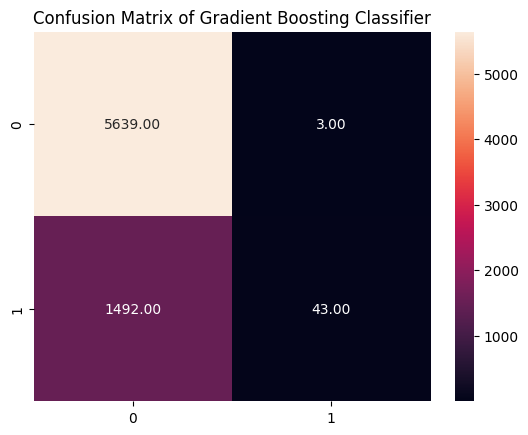

In [131]:
# computing confuion matrix
matrix_gbc = metrics.confusion_matrix(y_val,y_pred_gbc)

# visualizing confusion matrix using heatmap
sns.heatmap(matrix_gbc,annot=True,fmt=".2f")
plt.title("Confusion Matrix of Gradient Boosting Classifier")
plt.show()

- The confusion matrix show that the model is very good at classifying 0 label but it is not classifying the 1 label correctly.

# XGB

In [132]:
# initiating the model
xgb = XGBClassifier()

# fitting the model
xgb.fit(X_train,y_train)

# getting prediciton on the testing set
y_pred_xgb = xgb.predict(X_val)


# computing the accuracy score
score_xgb = metrics.accuracy_score(y_val,y_pred_xgb)


print("Accuracy Score of XGB Classifier on the validation set is {}".format(score_xgb))


Accuracy Score of XGB Classifier on the validation set is 0.7904416887278807


In [133]:
# computing classification report
report_xgb = metrics.classification_report(y_val,y_pred_xgb)
print("Classification Report of XGB Classifier")
print(report_xgb)

Classification Report of XGB Classifier
              precision    recall  f1-score   support

           0       0.79      0.99      0.88      5642
           1       0.64      0.04      0.08      1535

    accuracy                           0.79      7177
   macro avg       0.72      0.52      0.48      7177
weighted avg       0.76      0.79      0.71      7177



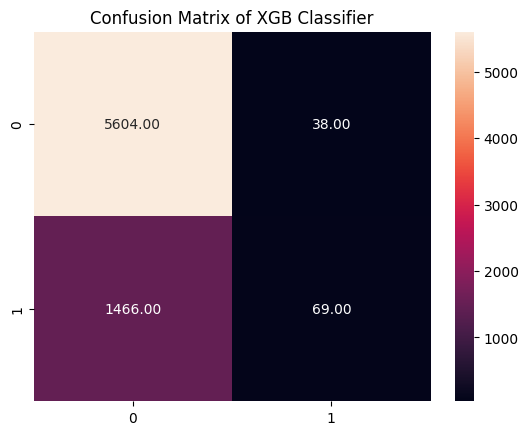

In [134]:
# computing confuion matrix
matrix_xgb = metrics.confusion_matrix(y_val,y_pred_xgb)

# visualizing confusion matrix using heatmap
sns.heatmap(matrix_xgb,annot=True,fmt=".2f")
plt.title("Confusion Matrix of XGB Classifier")
plt.show()

- The results show that XGB classifier is giving 79% accuracy but performance on class 1 data point is not satisfactory.

# Logistic Regression Model

In [135]:
# initiating the model
logreg = LogisticRegression()

# fitting the model
logreg.fit(X_train,y_train)

# getting prediciton on the testing set
y_pred_logreg = logreg.predict(X_val)

# computing the accuracy score
score_logreg = metrics.accuracy_score(y_val,y_pred_logreg)

print("Accuracy Score of Logistic Regression on the testing set is {}".format(score_logreg))

Accuracy Score of Logistic Regression on the testing set is 0.7851469973526544


In [136]:
# computing classification report
report_logreg = metrics.classification_report(y_val,y_pred_logreg)
print("Classification Report of Logreg")
print(report_logreg)

Classification Report of Logreg
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      5642
           1       0.00      0.00      0.00      1535

    accuracy                           0.79      7177
   macro avg       0.39      0.50      0.44      7177
weighted avg       0.62      0.79      0.69      7177



- As we can see, Logistic Regression Model accuracy is 78% but it's precision, recall and f1 score for class 1 is 0, it fails to perform on class 1 data.


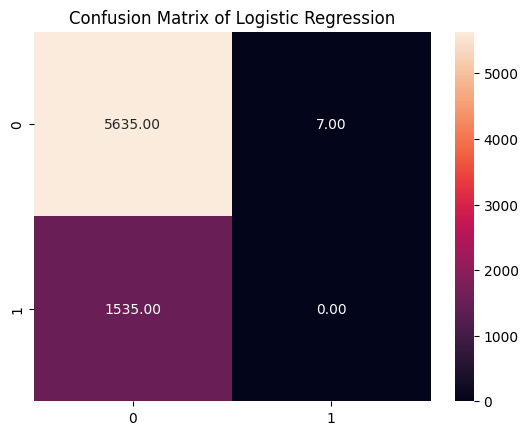

In [137]:
# computing confuion matrix
matrix_logreg = metrics.confusion_matrix(y_val,y_pred_logreg)

# visualizing confusion matrix using heatmap
sns.heatmap(matrix_logreg,annot=True,fmt=".2f")
plt.title("Confusion Matrix of Logistic Regression")
plt.show()

- The confussion matrix is showing that our logistic regression model failed to perform on the class 1, accuracy is good but misleading metric for our data.

# Ada Boost Model

In [138]:
# initiating the model
abc = AdaBoostClassifier()

# fitting the model
abc.fit(X_train,y_train)

# getting prediciton on the testing set
y_pred_abc = abc.predict(X_val)

# computing the accuracy score
score_abc = metrics.accuracy_score(y_val,y_pred_abc)

print("Accuracy Score of AdaBoost on the validation set is {}".format(score_abc))

Accuracy Score of AdaBoost on the validation set is 0.7851469973526544


In [139]:
# computing classification report
report_logreg = metrics.classification_report(y_val,y_pred_abc)
print("Classification Report of AdaBoost")
print(report_logreg)

Classification Report of AdaBoost
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      5642
           1       0.00      0.00      0.00      1535

    accuracy                           0.79      7177
   macro avg       0.39      0.50      0.44      7177
weighted avg       0.62      0.79      0.69      7177



- The accuracy of Ada Boost model is 78% but the classification report shows the precision, recall and f1 score of class 1 which are 0. So, model fails to classify the class1 data points. Again accuracy is misleading here.

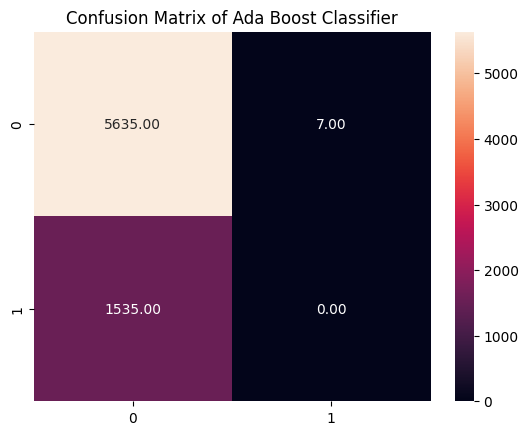

In [140]:
# computing confuion matrix
matrix_logreg = metrics.confusion_matrix(y_val,y_pred_abc)

# visualizing confusion matrix using heatmap
sns.heatmap(matrix_logreg,annot=True,fmt=".2f")
plt.title("Confusion Matrix of Ada Boost Classifier")
plt.show()

- Again the confusion matrix is showing the actual results of the model that model is failing to classify the class 1 data points.

# Applying Imbalance Class Techniques On Data
- Imbalance data techniques I will apply are:
    - SMOTE
    - ADASYN
    - SMOTE + TOMEK
    - SMOTE + ENN


# Note:
- Resampling techniques are applied only on training data, they are not applied on testing data. We train our model with balance data and evaluate our model on the testing data having class imbalance which describes original representation of target variable classes.

In [141]:
# Initializing the resampling techniques
smote = SMOTE(random_state=3)
adasyn = ADASYN(random_state=3)
smote_tomek = SMOTETomek(random_state=3)
smote_enn = SMOTEENN(random_state=3)

# Applying  SMOTE resampling to training data
X_resampled_smote, y_resampled_smote = smote.fit_resample(X_train, y_train)

# Applying  ADASYN resampling to training data
X_resampled_adasyn, y_resampled_adasyn = adasyn.fit_resample(X_train, y_train)

# Applying  SMOTE + TOMELINK resampling to training data
X_resampled_smote_tomek, y_resampled_smote_tomek = smote_tomek.fit_resample(X_train, y_train)

# Applying  SMOTE + ENN resampling to training data
X_resampled_smote_enn, y_resampled_smote_enn = smote_enn.fit_resample(X_train, y_train)




- I have applied resampling on the training data only, because for testing data will have original representation of the distribution to evaluate the models performance.

# SMOTE Resampling Technique

In [142]:
# as accuracy score is not a good metric i will use f1 score now
f1_scorer = make_scorer(f1_score)

# applying the validation
smote_results = evaluate_models(X_resampled_smote, y_resampled_smote, f1_scorer, models)

In [143]:
# results of smote resampling
smote_results

,Model,Average make_scorer(f1_score)
2,RandomForestClassifier,0.781490
7,XGBClassifier,0.755240
1,DecisionTreeClassifier,0.748338
0,KNeighborsClassifier,0.738845
6,GradientBoostingClassifier,0.695795
5,AdaBoostClassifier,0.684208
4,GaussianNB,0.666306
3,LogisticRegression,0.600158
8,SGDClassifier,0.573523


- Let's study the top four algorithms performance on the unseen test data.

In [144]:
def model(X_train, y_train, X_test, y_test, model):
    """
    This function will Train a given model on the training data and evaluate its performance on the testing data.

    Parameters:
    X_train (array-like): Features of the training data.
    y_train (array-like): Target labels of the training data.
    X_test (array-like): Features of the testing data.
    y_test (array-like): Target labels of the testing data.
    model (estimator): A machine learning model that implements the fit and predict methods.

    Returns:
    y_pred (array-like): Predicted labels on the testing data.
    accuracy (float): Accuracy score of the model on the testing data.
    f1_score (float): F1 score of the model on the testing data.
    """
    # Fitting the model on the training data
    model.fit(X_train, y_train)

    # Predicting labels on the testing data
    y_pred = model.predict(X_test)

    # Computing accuracy score
    accuracy = metrics.accuracy_score(y_test, y_pred)

    # Computing F1 score
    f1_score = metrics.f1_score(y_test, y_pred)

    return y_pred, accuracy, f1_score



In [145]:
def conf_matrix(y_pred, y_val, title):
    """
    This function will Generate and visualize a confusion matrix for evaluating a model's performance.

    Parameters:
    y_pred (array-like): Predicted labels.
    y_val (array-like): True labels.
    title (str): Title for the confusion matrix plot.

    Returns:
    None
    """
    # Generate a confusion matrix
    conf_matrix = metrics.confusion_matrix(y_pred, y_val)

    # Visualize the confusion matrix using a heatmap
    sns.heatmap(conf_matrix, annot=True, fmt=".2f")
    plt.title(title)
    plt.show()




# Random Forest

In [146]:
# initiating the Random Forest
rfc = RandomForestClassifier(random_state=21)

# applying the model and getting accuracy, f1 score and y_pred
y_pred_rfc_smote, accuracy_rfc_smote, f1_rfc_smote = model(X_resampled_smote, y_resampled_smote,X_val,y_val,rfc)

In [147]:
print("Accuracy Score of Random Forest on SMOTE resampled data {}".format(accuracy_rfc_smote))
print("f1 score of Random Forest on SMOTE resampled data {}".format(f1_rfc_smote))

Accuracy Score of Random Forest on SMOTE resampled data 0.7099066462310157
f1 score of Random Forest on SMOTE resampled data 0.2710084033613445


In [148]:
# computing classification report
print("Classification report of Random Forest On SMOTE Resampled Data")
print(metrics.classification_report(y_val,y_pred_rfc_smote))

Classification report of Random Forest On SMOTE Resampled Data
              precision    recall  f1-score   support

           0       0.80      0.83      0.82      5642
           1       0.29      0.25      0.27      1535

    accuracy                           0.71      7177
   macro avg       0.55      0.54      0.54      7177
weighted avg       0.69      0.71      0.70      7177



- We can clearly see improvement in our RFC model after applying SMOTE technique on data, the model is still not very good but it is better than models of unbalanced data which completely failed to classifiy class 1 data point.

- The precisio, recall and f1 score are still low but better.

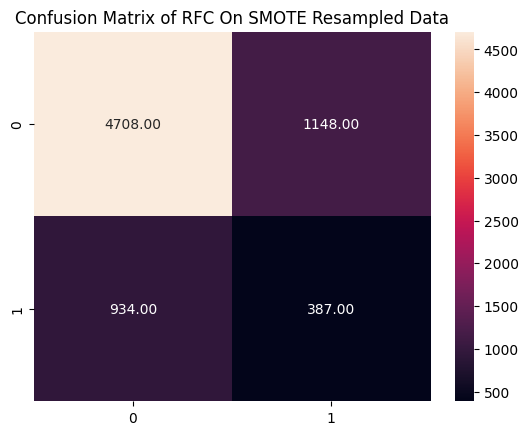

In [149]:
conf_matrix(y_pred_rfc_smote,y_val,"Confusion Matrix of RFC On SMOTE Resampled Data")

- The confusion matrix show that model is still bad at classifying class 1 but we saw improvement as compared to previoud models built on unbalanced data.

# XGB Classifier

In [150]:
# initiating the Random Forest
xgb = XGBClassifier(random_state=21)

# applying the model and getting accuracy, f1 score and y_pred
y_pred_xgb_smote, accuracy_xgb_smote, f1_xgb_smote = model(X_resampled_smote, y_resampled_smote,X_val,y_val,xgb)

In [151]:
print("Accuracy Score of XGB on SMOTE resampled data {}".format(accuracy_xgb_smote))
print("f1 score of XGB on SMOTE resampled data {}".format(f1_xgb_smote))

Accuracy Score of XGB on SMOTE resampled data 0.7864010032046816
f1 score of XGB on SMOTE resampled data 0.09450679267572357


In [152]:
# computing classification report
print("Classification report of XGB On SMOTE Resampled Data")
print(metrics.classification_report(y_val,y_pred_xgb_smote))

Classification report of XGB On SMOTE Resampled Data
              precision    recall  f1-score   support

           0       0.79      0.99      0.88      5642
           1       0.51      0.05      0.09      1535

    accuracy                           0.79      7177
   macro avg       0.65      0.52      0.49      7177
weighted avg       0.73      0.79      0.71      7177



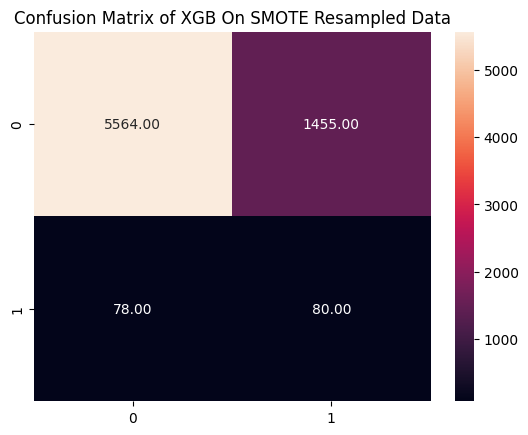

In [153]:
conf_matrix(y_pred_xgb_smote,y_val,"Confusion Matrix of XGB On SMOTE Resampled Data")

- The results of XGB classifier after applying smote resampling does not seem to improve much.

# Decision Tree

In [154]:
# initiating the Decison Tree model
dtc = DecisionTreeClassifier(random_state=21)

# applying the model and getting accuracy, f1 score and y_pred
y_pred_dtc_smote, accuracy_dtc_smote, f1_dtc_smote = model(X_resampled_smote, y_resampled_smote,X_val,y_val,dtc)

In [155]:
print("Accuracy Score of Decision Tree on SMOTE resampled data {}".format(accuracy_dtc_smote))
print("f1 score of DDecision Tree on SMOTE resampled data {}".format(f1_dtc_smote))

Accuracy Score of Decision Tree on SMOTE resampled data 0.6871952069109656
f1 score of DDecision Tree on SMOTE resampled data 0.265139116202946


In [156]:
# computing classification report
print("Classification report of Decision Tree On SMOTE Resampled Data")
print(metrics.classification_report(y_val,y_pred_dtc_smote))

Classification report of Decision Tree On SMOTE Resampled Data
              precision    recall  f1-score   support

           0       0.80      0.80      0.80      5642
           1       0.27      0.26      0.27      1535

    accuracy                           0.69      7177
   macro avg       0.53      0.53      0.53      7177
weighted avg       0.69      0.69      0.69      7177



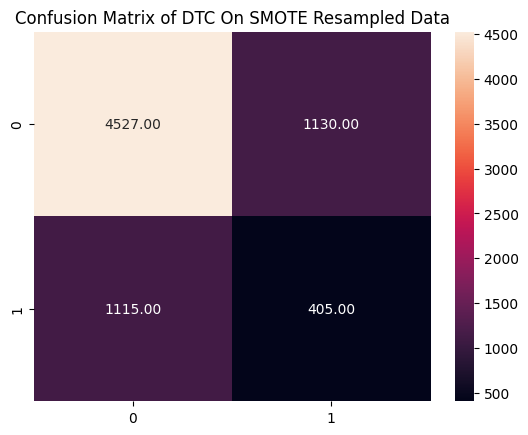

In [157]:
conf_matrix(y_pred_dtc_smote,y_val,"Confusion Matrix of DTC On SMOTE Resampled Data")

- The Decision Tree On Smote resampled data also showing good results for class 1 as compared to unbalanced data.

# KNearest Neighbor

In [158]:
# initiating the KNN model
knn = KNeighborsClassifier()

# applying the model and getting accuracy, f1 score and y_pred
y_pred_knn_smote, accuracy_knn_smote, f1_knn_smote = model(X_resampled_smote, y_resampled_smote,X_val,y_val,knn)

In [159]:
print("Accuracy Score of KNN on SMOTE resampled data {}".format(accuracy_knn_smote))
print("f1 score of KNN on SMOTE resampled data {}".format(f1_knn_smote))

Accuracy Score of KNN on SMOTE resampled data 0.6023408109237843
f1 score of KNN on SMOTE resampled data 0.3262511803588291


In [160]:
# computing classification report
print("Classification report of KNN On SMOTE Resampled Data")
print(metrics.classification_report(y_val,y_pred_knn_smote))

Classification report of KNN On SMOTE Resampled Data
              precision    recall  f1-score   support

           0       0.81      0.64      0.72      5642
           1       0.26      0.45      0.33      1535

    accuracy                           0.60      7177
   macro avg       0.53      0.55      0.52      7177
weighted avg       0.69      0.60      0.63      7177



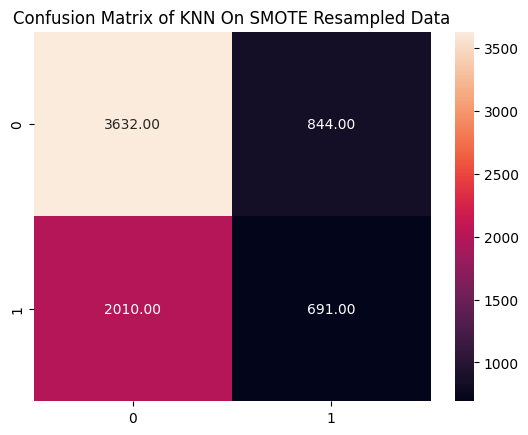

In [161]:
conf_matrix(y_pred_knn_smote,y_val,"Confusion Matrix of KNN On SMOTE Resampled Data")

- The KNN model is giving the best results for class 1 classification.
- It is giving the highest recall for class 1 as compared to other RFC and DTC models on SMOTE data.

# Adasyn Resampling

In [162]:
# as accuracy score is not a good metric i will use f1 score now
f1_scorer = make_scorer(f1_score)

# applying the validation
adasyn_results = evaluate_models(X_resampled_adasyn, y_resampled_adasyn, f1_scorer, models)

In [163]:
# results of adasyn resampling
adasyn_results

,Model,Average make_scorer(f1_score)
2,RandomForestClassifier,0.766251
7,XGBClassifier,0.755284
1,DecisionTreeClassifier,0.738376
0,KNeighborsClassifier,0.699331
6,GradientBoostingClassifier,0.687347
5,AdaBoostClassifier,0.678435
4,GaussianNB,0.662366
3,LogisticRegression,0.578752
8,SGDClassifier,0.547632


- I will study the top 4 models RFC, DTC and KNN.

# Random Forest

In [164]:
# initiating the Random Forest
rfc = RandomForestClassifier(random_state=21)

# applying the model and getting accuracy, f1 score and y_pred
y_pred_rfc_adasyn, accuracy_rfc_adasyn, f1_rfc_adasyn = model(X_resampled_adasyn, y_resampled_adasyn,X_val,y_val,rfc)

In [165]:
print("Accuracy Score of Random Forest on ADASYN resampled data {}".format(accuracy_rfc_adasyn))
print("f1 score of Random Forest on ADASYN resampled data {}".format(f1_rfc_adasyn))

Accuracy Score of Random Forest on ADASYN resampled data 0.7072593005434026
f1 score of Random Forest on ADASYN resampled data 0.26768909027535726


In [166]:
# computing classification report
print("Classification report of Random Forest On ADASYN Resampled Data")
print(metrics.classification_report(y_val,y_pred_rfc_adasyn))

Classification report of Random Forest On ADASYN Resampled Data
              precision    recall  f1-score   support

           0       0.80      0.83      0.82      5642
           1       0.29      0.25      0.27      1535

    accuracy                           0.71      7177
   macro avg       0.55      0.54      0.54      7177
weighted avg       0.69      0.71      0.70      7177



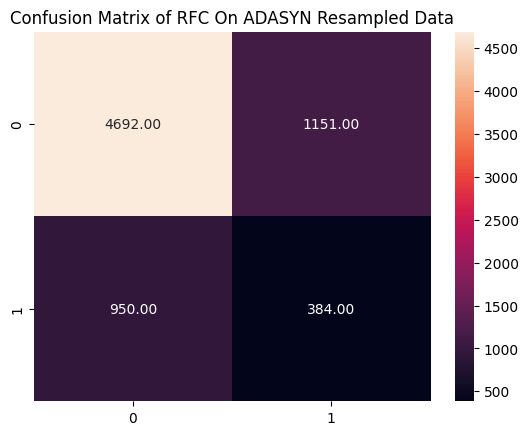

In [167]:
conf_matrix(y_pred_rfc_adasyn,y_val,"Confusion Matrix of RFC On ADASYN Resampled Data")

- The results show that adasyn resampling technique is performing better than the unabalanced data.
- The precision, recall and f1 score are not extremely good but better.

# XGB Classifier

In [168]:
# initiating the Random Forest
xgb = XGBClassifier(random_state=21)

# applying the model and getting accuracy, f1 score and y_pred
y_pred_xgb_adasyn, accuracy_xgb_adasyn, f1_xgb_adasyn = model(X_resampled_adasyn, y_resampled_adasyn,X_val,y_val,xgb)

In [169]:
print("Accuracy Score of XGB on ADASYN resampled data {}".format(accuracy_xgb_adasyn))
print("f1 score of XGB on ADASYN resampled data {}".format(f1_xgb_adasyn))

Accuracy Score of XGB on ADASYN resampled data 0.7894663508429706
f1 score of XGB on ADASYN resampled data 0.09575104727707959


In [170]:
# computing classification report
print("Classification report of XGB On ADASYN Resampled Data")
print(metrics.classification_report(y_val,y_pred_xgb_adasyn))

Classification report of XGB On ADASYN Resampled Data
              precision    recall  f1-score   support

           0       0.79      0.99      0.88      5642
           1       0.59      0.05      0.10      1535

    accuracy                           0.79      7177
   macro avg       0.69      0.52      0.49      7177
weighted avg       0.75      0.79      0.71      7177



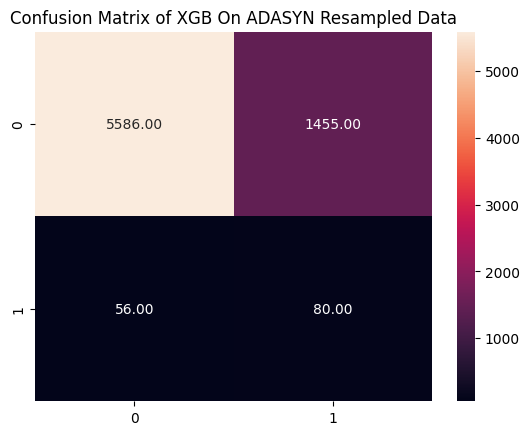

In [171]:
conf_matrix(y_pred_xgb_adasyn,y_val,"Confusion Matrix of XGB On ADASYN Resampled Data")

- The results of XGB classifier after applying ADASYN resmapling technique does not seem to improve very much.

# Decision Tree Classifier

In [172]:
# initiating the Decison Tree model
dtc = DecisionTreeClassifier(random_state=21)

# applying the model and getting accuracy, f1 score and y_pred
y_pred_dtc_adasyn, accuracy_dtc_adasyn, f1_dtc_adasyn = model(X_resampled_adasyn, y_resampled_adasyn,X_val,y_val,dtc)

In [173]:
print("Accuracy Score of Decision Tree on ADASYN resampled data {}".format(accuracy_dtc_adasyn))
print("f1 score of DDecision Tree on ADASYN resampled data {}".format(f1_dtc_adasyn))

Accuracy Score of Decision Tree on ADASYN resampled data 0.6919325623519577
f1 score of DDecision Tree on ADASYN resampled data 0.25979243388014733


In [174]:
# computing classification report
print("Classification report of Decision Tree On ADASYN Resampled Data")
print(metrics.classification_report(y_val,y_pred_dtc_adasyn))

Classification report of Decision Tree On ADASYN Resampled Data
              precision    recall  f1-score   support

           0       0.80      0.81      0.81      5642
           1       0.27      0.25      0.26      1535

    accuracy                           0.69      7177
   macro avg       0.53      0.53      0.53      7177
weighted avg       0.69      0.69      0.69      7177



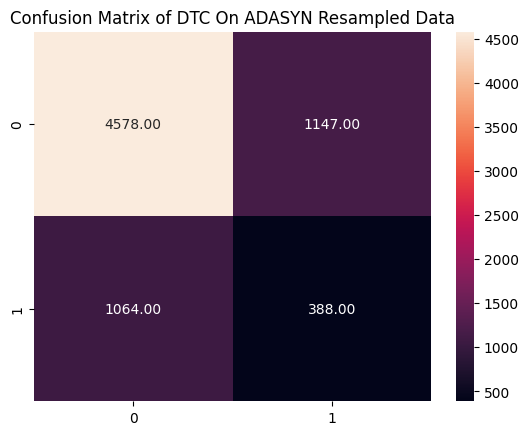

In [175]:
conf_matrix(y_pred_dtc_adasyn,y_val,"Confusion Matrix of DTC On ADASYN Resampled Data")

- The results of Decision Tree Classifier using ADASYN resmapling technique are better than the unbalanced data.

# KNeighbors Classifier

In [176]:
# initiating the KNN model
knn = KNeighborsClassifier()

# applying the model and getting accuracy, f1 score and y_pred
y_pred_knn_adasyn, accuracy_knn_adasyn, f1_knn_adasyn = model(X_resampled_adasyn, y_resampled_adasyn,X_val,y_val,knn)

In [177]:
print("Accuracy Score of KNN on ADASYN resampled data {}".format(accuracy_knn_adasyn))
print("f1 score of KNN on ADASYN resampled data {}".format(f1_knn_adasyn))

Accuracy Score of KNN on ADASYN resampled data 0.5867354047652222
f1 score of KNN on ADASYN resampled data 0.3361683079677708


In [178]:
# computing classification report
print("Classification report of KNN On ADASYN Resampled Data")
print(metrics.classification_report(y_val,y_pred_knn_adasyn))

Classification report of KNN On ADASYN Resampled Data
              precision    recall  f1-score   support

           0       0.82      0.61      0.70      5642
           1       0.26      0.49      0.34      1535

    accuracy                           0.59      7177
   macro avg       0.54      0.55      0.52      7177
weighted avg       0.70      0.59      0.62      7177



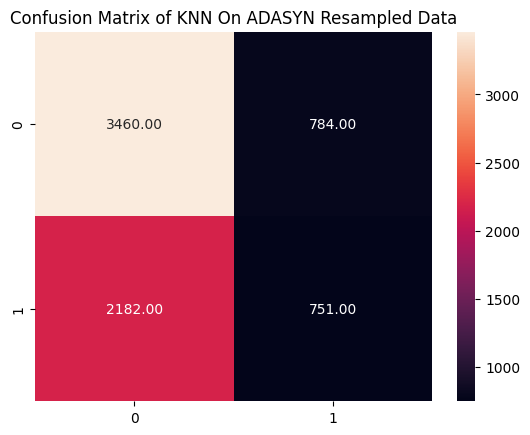

In [179]:
conf_matrix(y_pred_knn_adasyn,y_val,"Confusion Matrix of KNN On ADASYN Resampled Data")

- The KNN model metrics are suggesting good performance on class 1.

# SMOTE + TOMEK Resampling

In [180]:
# as accuracy score is not a good metric i will use f1 score now
f1_scorer = make_scorer(f1_score)

# applying the validation
smote_tomek_results = evaluate_models(X_resampled_smote_tomek, y_resampled_smote_tomek, f1_scorer, models)

In [181]:
# results of adasyn resampling
smote_tomek_results

,Model,Average make_scorer(f1_score)
2,RandomForestClassifier,0.806331
1,DecisionTreeClassifier,0.766870
7,XGBClassifier,0.759919
0,KNeighborsClassifier,0.750399
6,GradientBoostingClassifier,0.697977
5,AdaBoostClassifier,0.692723
4,GaussianNB,0.666901
3,LogisticRegression,0.604397
8,SGDClassifier,0.556876


- Let's take the top 3 models and see how they perfom on testing data.

# Random Forest  

In [182]:
# initiating the Random Forest
rfc = RandomForestClassifier(random_state=21)

# applying the model and getting accuracy, f1 score and y_pred
y_pred_rfc_smote_tomek, accuracy_rfc_smote_tomek, f1_rfc_smote_tomek = model(X_resampled_smote_tomek, y_resampled_smote_tomek,X_val,y_val,rfc)

In [183]:
print("Accuracy Score of Random Forest on SMOTE+TOMEK resampled data {}".format(accuracy_rfc_smote_tomek))
print("f1 score of Random Forest on SMOTE+TOMEK resampled data {}".format(f1_rfc_smote_tomek))

Accuracy Score of Random Forest on SMOTE+TOMEK resampled data 0.7062839626584924
f1 score of Random Forest on SMOTE+TOMEK resampled data 0.2765957446808511


In [184]:
# computing classification report
print("Classification report of Random Forest On SMOTE + TOMEK Resampled Data")
print(metrics.classification_report(y_val,y_pred_rfc_smote_tomek))

Classification report of Random Forest On SMOTE + TOMEK Resampled Data
              precision    recall  f1-score   support

           0       0.80      0.83      0.82      5642
           1       0.29      0.26      0.28      1535

    accuracy                           0.71      7177
   macro avg       0.55      0.54      0.55      7177
weighted avg       0.70      0.71      0.70      7177



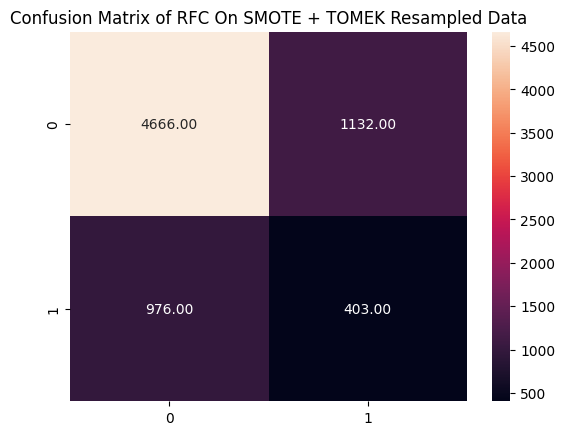

In [185]:
conf_matrix(y_pred_rfc_smote_tomek,y_val,"Confusion Matrix of RFC On SMOTE + TOMEK Resampled Data")

# XGB Classifier

In [186]:
# initiating the Random Forest
xgb = XGBClassifier(random_state=21)

# applying the model and getting accuracy, f1 score and y_pred
y_pred_xgb_smote_tomek, accuracy_xgb_smote_tomek, f1_xgb_smote_tomek = model(X_resampled_smote_tomek, y_resampled_smote_tomek,X_val,y_val,xgb)

In [187]:
print("Accuracy Score of XGB on SMOTE+TOMEK resampled data {}".format(accuracy_xgb_smote_tomek))
print("f1 score of XGB on SMOTE+TOMEK resampled data {}".format(f1_xgb_smote_tomek))

Accuracy Score of XGB on SMOTE+TOMEK resampled data 0.7872370071060332
f1 score of XGB on SMOTE+TOMEK resampled data 0.10017678255745432


In [188]:
# computing classification report
print("Classification report of XGB On SMOTE + TOMEK Resampled Data")
print(metrics.classification_report(y_val,y_pred_xgb_smote_tomek))

Classification report of XGB On SMOTE + TOMEK Resampled Data
              precision    recall  f1-score   support

           0       0.79      0.99      0.88      5642
           1       0.52      0.06      0.10      1535

    accuracy                           0.79      7177
   macro avg       0.66      0.52      0.49      7177
weighted avg       0.74      0.79      0.71      7177



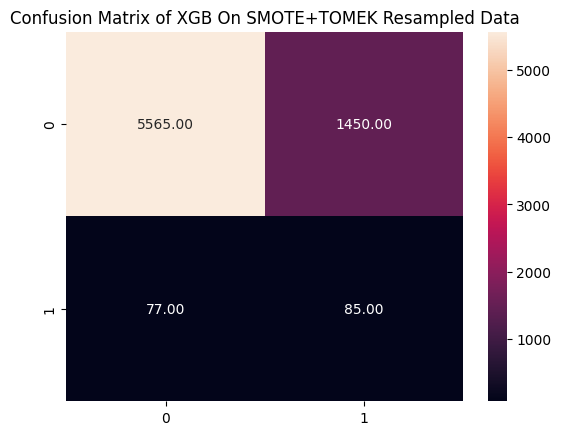

In [189]:
conf_matrix(y_pred_xgb_smote_tomek,y_val,"Confusion Matrix of XGB On SMOTE+TOMEK Resampled Data")

- The results for XGB classifier showing that the model is not very good at classifying the class 1 data point, results have improved than the imbalanced data but not very much.

# Decision Tree

In [190]:
# initiating the Decison Tree model
dtc = DecisionTreeClassifier(random_state=21)

# applying the model and getting accuracy, f1 score and y_pred
y_pred_dtc_smote_tomek, accuracy_dtc_smote_tomek, f1_dtc_smote_tomek = model(X_resampled_smote_tomek, y_resampled_smote_tomek,X_val,y_val,dtc)

In [191]:
print("Accuracy Score of Decision Tree on SMOTE+TOMEK resampled data {}".format(accuracy_dtc_smote_tomek))
print("f1 score of DDecision Tree on SMOTE+TOMEK resampled data {}".format(f1_dtc_smote_tomek))

Accuracy Score of Decision Tree on SMOTE+TOMEK resampled data 0.6838511913055594
f1 score of DDecision Tree on SMOTE+TOMEK resampled data 0.26018910987936095


In [192]:
# computing classification report
print("Classification report of Decision Tree On SMOTE+TOMEK Resampled Data")
print(metrics.classification_report(y_val,y_pred_dtc_smote_tomek))

Classification report of Decision Tree On SMOTE+TOMEK Resampled Data
              precision    recall  f1-score   support

           0       0.80      0.80      0.80      5642
           1       0.26      0.26      0.26      1535

    accuracy                           0.68      7177
   macro avg       0.53      0.53      0.53      7177
weighted avg       0.68      0.68      0.68      7177



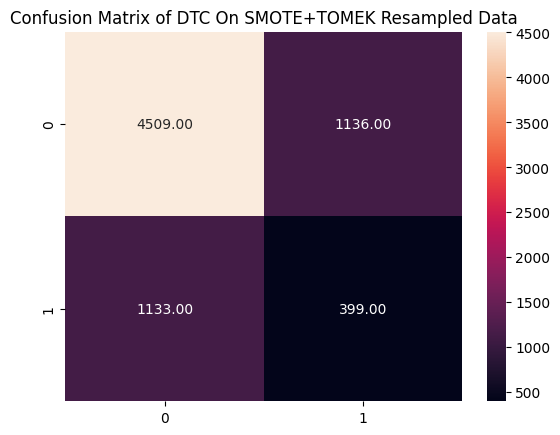

In [193]:
conf_matrix(y_pred_dtc_smote_tomek,y_val,"Confusion Matrix of DTC On SMOTE+TOMEK Resampled Data")

# KNeighbors Classifier

In [194]:
# initiating the KNN model
knn = KNeighborsClassifier()

# applying the model and getting accuracy, f1 score and y_pred
y_pred_knn_smote_tomek, accuracy_knn_smote_tomek, f1_knn_smote_tomek = model(X_resampled_smote_tomek, y_resampled_smote_tomek,X_val,y_val,knn)

In [195]:
print("Accuracy Score of KNN on SMOTE+TOMEK resampled data {}".format(accuracy_knn_smote_tomek))
print("f1 score of KNN on SMOTE+TOMEK resampled data {}".format(f1_knn_smote_tomek))

Accuracy Score of KNN on SMOTE+TOMEK resampled data 0.5992754632854953
f1 score of KNN on SMOTE+TOMEK resampled data 0.32835123773937414


In [196]:
# computing classification report
print("Classification report of KNN On SMOTE+TOMEK Resampled Data")
print(metrics.classification_report(y_val,y_pred_knn_smote_tomek))

Classification report of KNN On SMOTE+TOMEK Resampled Data
              precision    recall  f1-score   support

           0       0.81      0.64      0.71      5642
           1       0.26      0.46      0.33      1535

    accuracy                           0.60      7177
   macro avg       0.53      0.55      0.52      7177
weighted avg       0.69      0.60      0.63      7177



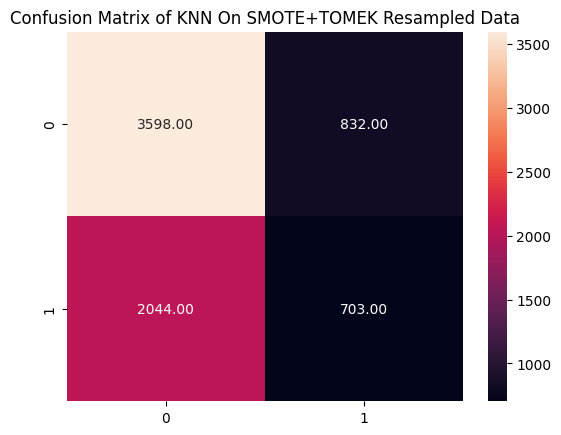

In [197]:
conf_matrix(y_pred_knn_smote_tomek,y_val,"Confusion Matrix of KNN On SMOTE+TOMEK Resampled Data")

- The results we get after applying SMOTE + TOMEK resampling technique are better than the unbalanced data.

# SMOTE + ENN Technique

In [198]:
# as accuracy score is not a good metric i will use f1 score now
f1_scorer = make_scorer(f1_score)

# applying the validation
smote_enn_results = evaluate_models(X_resampled_smote_enn, y_resampled_smote_enn, f1_scorer, models)

In [199]:
# results of smote + enn resampling
smote_enn_results

,Model,Average make_scorer(f1_score)
2,RandomForestClassifier,0.950651
0,KNeighborsClassifier,0.909226
1,DecisionTreeClassifier,0.894669
7,XGBClassifier,0.809599
6,GradientBoostingClassifier,0.788393
5,AdaBoostClassifier,0.761668
3,LogisticRegression,0.716890
8,SGDClassifier,0.679527
4,GaussianNB,0.574977


- Let's study the performance of top three models on the testing or validation set.

# Random Forest

In [200]:
# initiating the Random Forest
rfc = RandomForestClassifier(random_state=21)

# applying the model and getting accuracy, f1 score and y_pred
y_pred_rfc_smote_enn, accuracy_rfc_smote_enn, f1_rfc_smote_enn = model(X_resampled_smote_enn, y_resampled_smote_enn,X_val,y_val,rfc)

In [201]:
print("Accuracy Score of Random Forest on SMOTE+ENN resampled data {}".format(accuracy_rfc_smote_enn))
print("f1 score of Random Forest on SMOTE+ENN resampled data {}".format(f1_rfc_smote_enn))

Accuracy Score of Random Forest on SMOTE+ENN resampled data 0.6200362268357252
f1 score of Random Forest on SMOTE+ENN resampled data 0.32849051957645903


In [202]:
# computing classification report
print("Classification report of Random Forest On SMOTE + ENN Resampled Data")
print(metrics.classification_report(y_val,y_pred_rfc_smote_enn))

Classification report of Random Forest On SMOTE + ENN Resampled Data
              precision    recall  f1-score   support

           0       0.81      0.67      0.74      5642
           1       0.26      0.43      0.33      1535

    accuracy                           0.62      7177
   macro avg       0.54      0.55      0.53      7177
weighted avg       0.70      0.62      0.65      7177



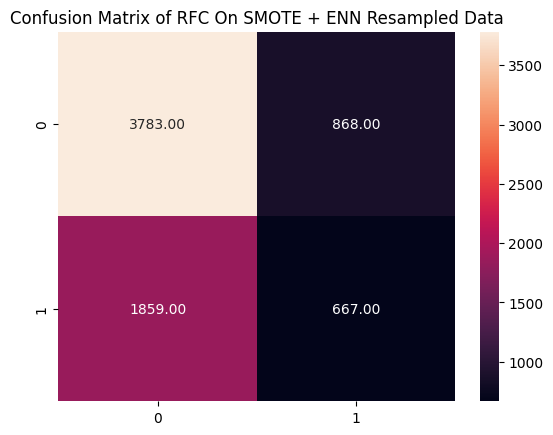

In [203]:
conf_matrix(y_pred_rfc_smote_enn,y_val,"Confusion Matrix of RFC On SMOTE + ENN Resampled Data")

# XGB Classifier

In [204]:
# initiating the Random Forest
xgb = XGBClassifier(random_state=21)

# applying the model and getting accuracy, f1 score and y_pred
y_pred_xgb_smote_enn, accuracy_xgb_smote_enn, f1_xgb_smote_enn = model(X_resampled_smote_enn, y_resampled_smote_enn,X_val,y_val,xgb)

In [205]:
print("Accuracy Score of XGB on SMOTE+ENN resampled data {}".format(accuracy_xgb_smote_enn))
print("f1 score of XGB on SMOTE+ENN resampled data {}".format(f1_xgb_smote_enn))

Accuracy Score of XGB on SMOTE+ENN resampled data 0.7223073707677302
f1 score of XGB on SMOTE+ENN resampled data 0.28745084018591344


In [206]:
# computing classification report
print("Classification report of XGB On SMOTE + ENN Resampled Data")
print(metrics.classification_report(y_val,y_pred_xgb_smote_enn))

Classification report of XGB On SMOTE + ENN Resampled Data
              precision    recall  f1-score   support

           0       0.81      0.85      0.83      5642
           1       0.32      0.26      0.29      1535

    accuracy                           0.72      7177
   macro avg       0.56      0.55      0.56      7177
weighted avg       0.70      0.72      0.71      7177



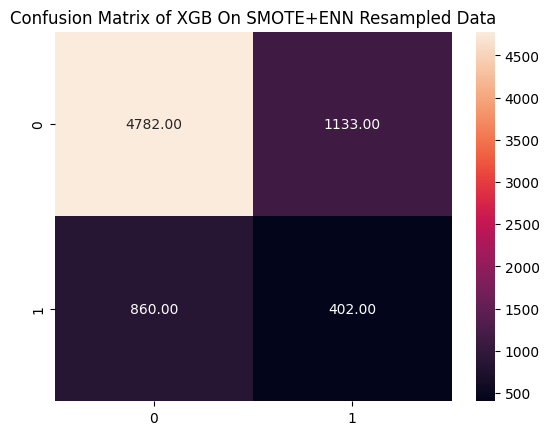

In [207]:
conf_matrix(y_pred_xgb_smote_enn,y_val,"Confusion Matrix of XGB On SMOTE+ENN Resampled Data")

- The results show that out of all resmapling techniques XGB performing good on class 1 data points after SMOTE + ENN resampling.

# Decision Tree

In [208]:
# initiating the Decison Tree model
dtc = DecisionTreeClassifier(random_state=21)

# applying the model and getting accuracy, f1 score and y_pred
y_pred_dtc_smote_enn, accuracy_dtc_smote_enn, f1_dtc_smote_enn = model(X_resampled_smote_enn, y_resampled_smote_enn,X_val,y_val,dtc)

In [209]:
print("Accuracy Score of Decision Tree on SMOTE+ENN resampled data {}".format(accuracy_dtc_smote_enn))
print("f1 score of DDecision Tree on SMOTE+ENN resampled data {}".format(f1_dtc_smote_enn))

Accuracy Score of Decision Tree on SMOTE+ENN resampled data 0.6157168733454089
f1 score of DDecision Tree on SMOTE+ENN resampled data 0.313588850174216


In [210]:
# computing classification report
print("Classification report of Decision Tree On SMOTE+ENN Resampled Data")
print(metrics.classification_report(y_val,y_pred_dtc_smote_enn))

Classification report of Decision Tree On SMOTE+ENN Resampled Data
              precision    recall  f1-score   support

           0       0.81      0.67      0.73      5642
           1       0.25      0.41      0.31      1535

    accuracy                           0.62      7177
   macro avg       0.53      0.54      0.52      7177
weighted avg       0.69      0.62      0.64      7177



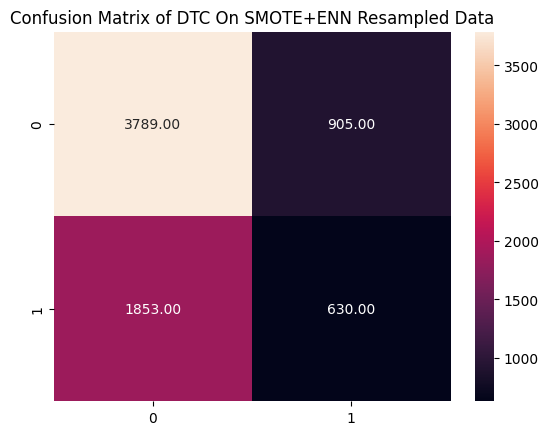

In [211]:
conf_matrix(y_pred_dtc_smote_enn,y_val,"Confusion Matrix of DTC On SMOTE+ENN Resampled Data")

# KNeighbors Classifier

In [212]:
# initiating the KNN model
knn = KNeighborsClassifier()

# applying the model and getting accuracy, f1 score and y_pred
y_pred_knn_smote_enn, accuracy_knn_smote_enn, f1_knn_smote_enn = model(X_resampled_smote_enn, y_resampled_smote_enn,X_val,y_val,knn)

In [213]:
print("Accuracy Score of KNN on SMOTE+ENN resampled data {}".format(accuracy_knn_smote_enn))
print("f1 score of KNN on SMOTE+ENN resampled data {}".format(f1_knn_smote_enn))

Accuracy Score of KNN on SMOTE+ENN resampled data 0.5516232409084576
f1 score of KNN on SMOTE+ENN resampled data 0.3438009787928222


In [214]:
# computing classification report
print("Classification report of KNN On SMOTE+ENN Resampled Data")
print(metrics.classification_report(y_val,y_pred_knn_smote_enn))

Classification report of KNN On SMOTE+ENN Resampled Data
              precision    recall  f1-score   support

           0       0.82      0.55      0.66      5642
           1       0.25      0.55      0.34      1535

    accuracy                           0.55      7177
   macro avg       0.53      0.55      0.50      7177
weighted avg       0.70      0.55      0.59      7177



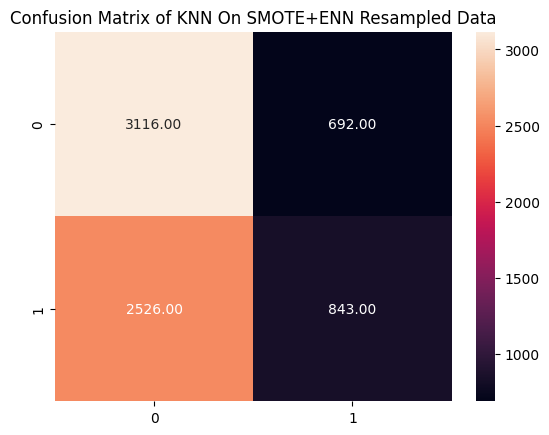

In [215]:
conf_matrix(y_pred_knn_smote_enn,y_val,"Confusion Matrix of KNN On SMOTE+ENN Resampled Data")

- The results given by resmapling technique SMOTE + ENN are better than the resuts given by unbalanced data.

In [216]:
# storing the f1 scores of Random Forest Model
f1_score_rfc = [f1_rfc_smote,f1_rfc_adasyn,f1_rfc_smote_tomek,f1_rfc_smote_enn]

# storing the f1 scores of XGB Model
f1_score_xgb = [f1_xgb_smote,f1_xgb_adasyn,f1_xgb_smote_tomek,f1_xgb_smote_enn]


# storing the f1 scores of Decision Tree Model
f1_score_dtc = [f1_dtc_smote,f1_dtc_adasyn,f1_dtc_smote_tomek,f1_dtc_smote_enn]

# storing the f1 scores of KNN Model
f1_score_knn = [f1_rfc_smote,f1_knn_adasyn,f1_knn_smote_tomek,f1_knn_smote_enn]
index = ["SMOTE","ADSYN","SMOTE + TOMEK","SMOTE + ENN"]
column_names = ["Random Forest","XGB Classifier","Decision Tree","KNeighbors Classifier"]

data = {
    "Random Forest": f1_score_rfc,
    "XGB Classifier": f1_score_xgb,
    "Decision Tree": f1_score_dtc,
    "KNeighbors Classifier": f1_score_knn,
}

# Create a DataFrame
df_comparison_resampling = pd.DataFrame(data, index=index)

In [217]:
# f1 score comparison
df_comparison_resampling

,Random Forest,XGB Classifier,Decision Tree,KNeighbors Classifier
SMOTE,0.271008,0.094507,0.265139,0.271008
ADSYN,0.267689,0.095751,0.259792,0.336168
SMOTE + TOMEK,0.276596,0.100177,0.260189,0.328351
SMOTE + ENN,0.328491,0.287451,0.313589,0.343801


# Conclusion Of Resampling Techniques
- I applied 4 resampling techniques, if we compare the performance of all four with the unbalanced data then they outperformed the unbalanced data.

- Now, the choice of final technique and the model depends on our aim, if we want a model that classifies 1 classes more than we will chose a model that has high recall for class 1. If our aim is to precisely predict class 1 label than we will use a model with high precision for class 1.

- There is always tradeoff in machine learning, the choice of model depends upon the objective of the task.

- I will chose SMOTE + ENN Resampling technique as it has good recall for class 1. Although the accuray seems to be low, but accuracy is a misleading metric.

# Note:
- One drawback of resampling is overfitting, as we had a lot of difference in the validation f1 scores and training. We are getting good results as compared to models trained on unbalanced data. We can further reduce overfitting by regularizing the models.

# Dimentionality Reduction
- Dimentionality reduction is a technique to bring a high dimentional data into lower dimentionla data preserving the same or nearly same results.
- As our data has over 190 features, so we can use PCA and see if we get equal and similar results.


In [219]:
# Applying PCA for dimensionality reduction
# 0.99 means, give me that number of components that can explain 99% of variance
pca = PCA(n_components=0.99)

# fitting and transforming the features
X_pca = pca.fit_transform(X)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Applying SMOTE + ENN
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)

# Training and evaluating classifiers on the testing or valiation set
classifiers = [
    ("Random Forest", RandomForestClassifier(random_state=42)),
    ("XGB Classifier", XGBClassifier(random_state=42)),
    ("Decision Tree", DecisionTreeClassifier(random_state=42)),
    ("KNeighbors", KNeighborsClassifier())
]

results = []
for name, classifier in classifiers:
    clf = classifier.fit(X_resampled, y_resampled)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results.append([name, accuracy, f1])

# Creating a DataFrame to display results
pca_results_df = pd.DataFrame(results, columns=["Classifier", "Accuracy", "F1 Score"])
pca_results_df


,Classifier,Accuracy,F1 Score
0,Random Forest,0.621290,0.346949
1,XGB Classifier,0.591612,0.357096
2,Decision Tree,0.597743,0.320226
3,KNeighbors,0.505922,0.337444


In [220]:
print("Number of features in data are {}".format(X.shape[1]))
print("Number of features in after dimentionality reduction are {}".format(X_pca.shape[1]))

Number of features in data are 198
Number of features in after dimentionality reduction are 12


- We obtained nearly same results after applying PCA taking into consideration the f1 score of models.
- PCA is a dimentionality reduction technique, it is applied on large datasets, the results are showing with a little compromise to accuracy we can get almost the same results by using 12 features rather than using 198 features.

# Now I will Use Full Data
- I have done my experiementation by sampling 10% data from the complete data, now I will use the complete data and do the modeling using the best techniques I have found.

- I will also use PCA to reduce the number of features from 198 to 12.

In [221]:
# creating features of the complete data
X_final = final_df.drop(["Consumer disputed?"],axis=1)

# creating the target variable
y_final = final_df[["Consumer disputed?"]]

In [222]:
# transforming the features
X_pca_full = pca.fit_transform(X_final)


In [223]:
# splitting data into training and test set
X_train,X_test,y_train,y_test = train_test_split(X_pca_full,y_final,test_size=0.2,random_state=4)

In [224]:
# Applying SMOTE + ENN
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)

# Random Forest

In [225]:
# initiating the Random Forest
rfc_final = RandomForestClassifier(random_state=21)

# fitting model on data
rfc_final.fit(X_resampled,y_resampled)

# prediction on testing data
y_pred_rfc_final = rfc_final.predict(X_test)

# accuracy score
accuracy_rfc_final = metrics.accuracy_score(y_test,y_pred_rfc_final)

# f1 score
f1_rfc_final = metrics.f1_score(y_test,y_pred_rfc_final)

print("RFC final accuracy {}".format(accuracy_rfc_final))
print("RFC final f1 score {}".format(f1_rfc_final))

RFC final accuracy 0.6994927677600958
RFC final f1 score 0.27878666265342295


In [226]:
# computing classification report
print("Classification report of Random Forest  on complete data Data")
print(metrics.classification_report(y_test,y_pred_rfc_final))

Classification report of Random Forest  on complete data Data
              precision    recall  f1-score   support

           0       0.81      0.81      0.81     56657
           1       0.28      0.28      0.28     15105

    accuracy                           0.70     71762
   macro avg       0.54      0.54      0.54     71762
weighted avg       0.70      0.70      0.70     71762



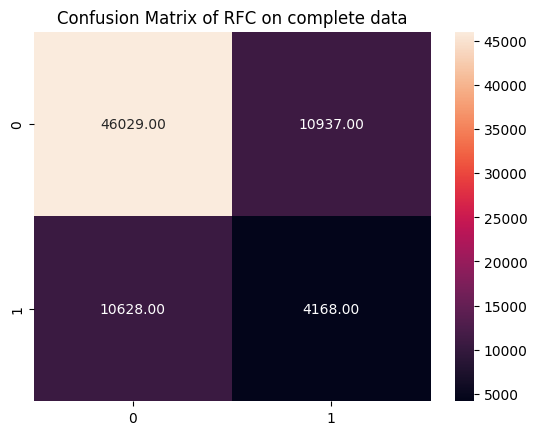

In [227]:
conf_matrix(y_pred_rfc_final,y_test,"Confusion Matrix of RFC on complete data")

# XGB Classifier

In [228]:
# initiating the Random Forest
xgb_final = XGBClassifier(random_state=21)

# fitting model on data
xgb_final.fit(X_resampled,y_resampled)

# prediction on testing data
y_pred_xgb_final = xgb_final.predict(X_test)

# accuracy score
accuracy_xgb_final = metrics.accuracy_score(y_test,y_pred_xgb_final)

# f1 score
f1_xgb_final = metrics.f1_score(y_test,y_pred_xgb_final)

print("XGB final accuracy {}".format(accuracy_xgb_final))
print("XGB final f1 score {}".format(f1_xgb_final))

XGB final accuracy 0.6880243025556702
XGB final f1 score 0.30571233641381873


In [229]:
# computing classification report
print("Classification report of Random Forest  on complete data Data")
print(metrics.classification_report(y_test,y_pred_xgb_final))

Classification report of Random Forest  on complete data Data
              precision    recall  f1-score   support

           0       0.81      0.78      0.80     56657
           1       0.29      0.33      0.31     15105

    accuracy                           0.69     71762
   macro avg       0.55      0.56      0.55     71762
weighted avg       0.70      0.69      0.70     71762



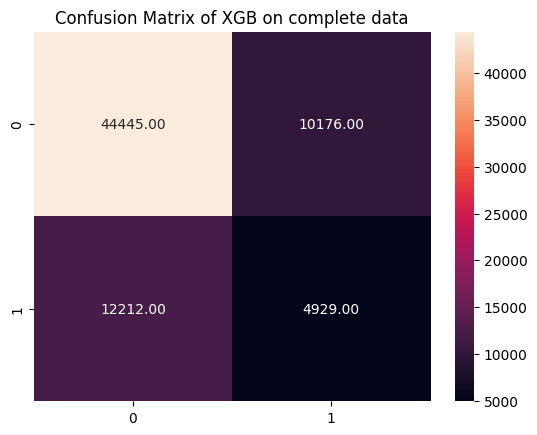

In [230]:
conf_matrix(y_pred_xgb_final,y_test,"Confusion Matrix of XGB on complete data")

# Decision Tree Classifier

In [231]:
# initiating the Random Forest
dtc_final = DecisionTreeClassifier(random_state=21)

# fitting model on data
dtc_final.fit(X_resampled,y_resampled)

# prediction on testing data
y_pred_dtc_final = dtc_final.predict(X_test)

# accuracy score
accuracy_dtc_final = metrics.accuracy_score(y_test,y_pred_dtc_final)

# f1 score
f1_dtc_final = metrics.f1_score(y_test,y_pred_rfc_final)

print("DTC final accuracy {}".format(accuracy_dtc_final))
print("DTC final f1 score {}".format(f1_dtc_final))

DTC final accuracy 0.6737131072155179
DTC final f1 score 0.27878666265342295


In [232]:
# computing classification report
print("Classification report of Decision Tree on complete data Data")
print(metrics.classification_report(y_test,y_pred_dtc_final))

Classification report of Decision Tree on complete data Data
              precision    recall  f1-score   support

           0       0.81      0.77      0.79     56657
           1       0.27      0.31      0.29     15105

    accuracy                           0.67     71762
   macro avg       0.54      0.54      0.54     71762
weighted avg       0.69      0.67      0.68     71762



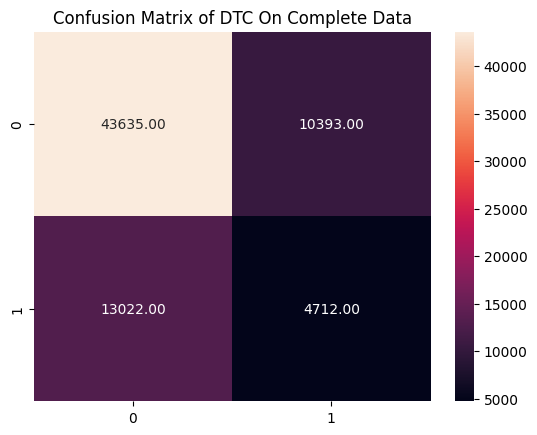

In [233]:
conf_matrix(y_pred_dtc_final,y_test,"Confusion Matrix of DTC On Complete Data")

# KNeighbors Classifier

In [234]:
# initiating the Random Forest
knn_final = KNeighborsClassifier()

# fitting model on data
knn_final.fit(X_resampled,y_resampled)

# prediction on testing data
y_pred_knn_final = knn_final.predict(X_test)

# accuracy score
accuracy_knn_final = metrics.accuracy_score(y_test,y_pred_knn_final)

# f1 score
f1_knn_final = metrics.f1_score(y_test,y_pred_knn_final)

print("KNN final accuracy {}".format(accuracy_knn_final))
print("KNN final f1 score {}".format(f1_knn_final))

KNN final accuracy 0.6024915693542543
KNN final f1 score 0.31964319786300327


In [235]:
# computing classification report
print("Classification report of KNN on complete data Data")
print(metrics.classification_report(y_test,y_pred_knn_final))

Classification report of KNN on complete data Data
              precision    recall  f1-score   support

           0       0.81      0.64      0.72     56657
           1       0.25      0.44      0.32     15105

    accuracy                           0.60     71762
   macro avg       0.53      0.54      0.52     71762
weighted avg       0.69      0.60      0.64     71762



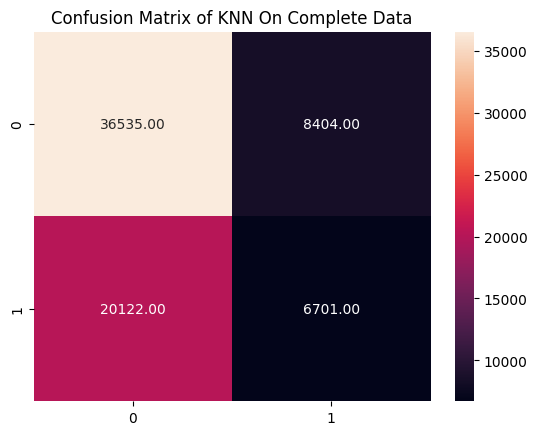

In [236]:
conf_matrix(y_pred_knn_final,y_test,"Confusion Matrix of KNN On Complete Data")

- After PCA and resammpling on complete data, Our models are performing quite well as compared to unbalanced data.


# Voting Ensemble

In [237]:
# Creating the voting classifier with soft voting by combinning all four models
voting_classifier = VotingClassifier(
    estimators=[('Random Forest', rfc_final),("XGB CLassifier",xgb_final), ('Decision Tree', dtc_final), ('KNN', knn_final)],
    voting='soft'
)

# Fitting the voting classifier on your training data )
voting_classifier.fit(X_train, y_train)

# Predict using the voting classifier
y_pred_voting = voting_classifier.predict(X_test)

# computing accuracy and f1 score
accuracy = metrics.accuracy_score(y_test, y_pred_voting)
f1 = metrics.f1_score(y_test, y_pred_voting)

print("Voting Classifier Accuracy:", accuracy)
print("Voting Classifier F1 Score:", f1)


Voting Classifier Accuracy: 0.7682199492767761
Voting Classifier F1 Score: 0.17946820581125747


In [238]:
# computing classification report
print("Classification report of voting classfier")
print(metrics.classification_report(y_test,y_pred_voting))

Classification report of voting classfier
              precision    recall  f1-score   support

           0       0.80      0.94      0.87     56657
           1       0.35      0.12      0.18     15105

    accuracy                           0.77     71762
   macro avg       0.58      0.53      0.52     71762
weighted avg       0.71      0.77      0.72     71762



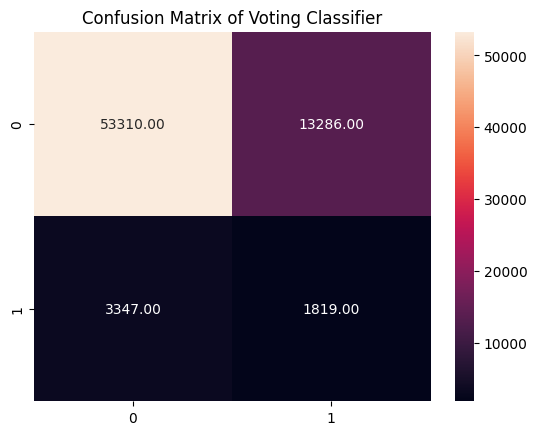

In [239]:
conf_matrix(y_pred_voting,y_test,"Confusion Matrix of Voting Classifier")

- The voting classifier accuracy is more as compared to individual models RFC, XGB, DTC and KNN but f1 score is less.


# Best Model Selection
- Now, the choice of models comes to the objective, if our objective is to classify class 1 data points more correctly than we will focus on recall, in this case KNN will be a good choice. Random Forest is good to me as our objective is to make a balanced classifier not focused completely on class 1

- If we investigate the confusion matrix (voting classifier) than it is classifying both classes class 1 and class 0, but not very good at classifying class 1. So, again model selction will depend on our objective. So, I will use this model which is ensemble of four models to predict the new data points.

- From models of 78% accuracy but 0 f1 score, we reached a model with 76% accuracy and 0.18 f1 score. Stil the model is not very good, but at least classifying the class 1.

# Suggestions For Model Improvement
- The model can be improved by using more data which does not have class imbalance.
- The data quality matters for making good models, improving the quality of data can improve performance.
- More detailed feature selectiona and feature engineering may be of some help.
- Using deep learning may also improve the performance.

In [240]:
# adding a feature that is lacked in testing data manually
Feature168 = [0] * 119606
final_df_test['Feature168'] = Feature168

# applying the PCA on the testing data
test_pca = pca.transform(final_df_test)

# prediction on the testing data using voting classifier
test_predictions = voting_classifier.predict(test_pca)

# creating the dataframe of predictions
test_predictions_df = pd.DataFrame({"Testing Prediction":test_predictions})

# creating a csv file of the predictions on the testing set
test_predictions_df.to_csv("Test Data Prediction.csv")

In [241]:
# saving the voting classifier model (best model)
model_filename = "best_model.pkl"
joblib.dump(voting_classifier, model_filename)

['best_model.pkl']

# References
- [Imbalance Class Classification (Resampling Techniques)](https://www.analyticsvidhya.com/blog/2020/10/overcoming-class-imbalance-using-smote-techniques/)
